In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
dF = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
dF.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.0,0.333333,0.50,1.000000,0.75
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,0.0,1.0,0.333333,1.00,0.111111,0.00
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,0.0,1.0,0.666667,0.25,0.111111,0.50
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.0,0.333333,0.00,0.222222,0.75
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.0,0.666667,0.00,0.111111,0.25


In [5]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

In [6]:
dF.describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.441784,0.292914,0.227927,0.300518,0.264628,0.444319,0.316308,0.244975,0.368545,0.173273,0.277463,0.440921,0.229898,0.315213,0.471687
std,0.196813,0.294351,0.209842,0.256381,0.288454,0.197971,0.226178,0.214712,0.230461,0.378698,0.448001,0.178532,0.251877,0.276110,0.252071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.079383,0.071429,0.000000,0.333333,0.150000,0.125000,0.185135,0.000000,0.000000,0.333333,0.000000,0.111111,0.250000
50%,0.404762,0.214286,0.156611,0.214286,0.333333,0.333333,0.250000,0.187500,0.329663,0.000000,0.000000,0.333333,0.250000,0.222222,0.500000
75%,0.571429,0.464286,0.301351,0.500000,0.333333,0.500000,0.450000,0.437500,0.502469,0.000000,1.000000,0.666667,0.250000,0.444444,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Feature Selection</h3>

In [7]:
df = pd.DataFrame()

columns_to_add = ['JobLevel', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'OverallSatisfaction']

for element in columns_to_add:
    df[element] = dF[element]
    
df

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
0,0.50,0.000000,0.40,0.4375,0.333333
1,1.00,0.333333,0.05,0.5000,0.333333
2,0.25,0.333333,0.05,0.3125,0.666667
3,0.00,0.000000,0.15,0.4375,0.333333
4,0.00,0.000000,0.50,0.1250,0.666667
...,...,...,...,...,...
878,0.00,0.000000,0.50,0.0000,0.666667
879,0.00,0.666667,0.85,0.0000,0.666667
880,0.25,0.000000,0.55,0.4375,0.333333
881,0.25,0.000000,0.15,0.1250,0.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JobLevel             883 non-null    float64
 1   StockOptionLevel     883 non-null    float64
 2   YearsAtCompany       883 non-null    float64
 3   YearsInCurrentRole   883 non-null    float64
 4   OverallSatisfaction  883 non-null    float64
dtypes: float64(5)
memory usage: 34.6 KB


In [9]:
df.describe()

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
count,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.229898,0.264628,0.316308,0.244975,0.440921
std,0.251877,0.288454,0.226178,0.214712,0.178532
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.150000,0.125000,0.333333
50%,0.250000,0.333333,0.250000,0.187500,0.333333
75%,0.250000,0.333333,0.450000,0.437500,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Convert the DataFrame to a numpy array:
train_data = df.values

In [11]:
train_data

array([[0.5       , 0.        , 0.4       , 0.4375    , 0.33333333],
       [1.        , 0.33333333, 0.05      , 0.5       , 0.33333333],
       [0.25      , 0.33333333, 0.05      , 0.3125    , 0.66666667],
       ...,
       [0.25      , 0.        , 0.55      , 0.4375    , 0.33333333],
       [0.25      , 0.        , 0.15      , 0.125     , 0.33333333],
       [0.25      , 0.        , 0.5       , 0.25      , 0.33333333]])

In [12]:
type(train_data)

numpy.ndarray

<h3>K-means</h3>

We run the k-means algorithm with a range of k from 2 to 50 to find the optimal k, depending on four measures: Sum of Squared Error, Silhouette Score, Calinski-Harabaz Score and Davies-Bouldin Score.

* <b>Sum of Squared Error</b>
    Sum of squared distances of samples to their closest cluster center.

* <b>Silhouette Score</b>
    Compute the mean Silhouette Coefficient of all samples.
    The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
    This function returns the mean Silhouette Coefficient over all samples. 
    The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
    
* <b>Calinski and Harabasz score</b>
    It is also known as the Variance Ratio Criterion.
    The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.
    
* <b>Davies-Bouldin score</b>
   The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
    The minimum score is zero, with lower values indicating better clustering.

k:  2 SSE:  192.73828744419848 Silhouette Score:  0.23528062560140947 
 Calinski-Harabaz:  230.83092318060386 Davies-Bouldin:  1.8030074043504871

k:  3 SSE:  152.52077835785397 Silhouette Score:  0.24928586242130577 
 Calinski-Harabaz:  261.70319535523066 Davies-Bouldin:  1.484766398816271

k:  4 SSE:  133.43377938000722 Silhouette Score:  0.20670305400666905 
 Calinski-Harabaz:  241.11112481332677 Davies-Bouldin:  1.4750398913264537

k:  5 SSE:  121.57113387151746 Silhouette Score:  0.20796038045155332 
 Calinski-Harabaz:  219.67119568583269 Davies-Bouldin:  1.5409641287154838

k:  6 SSE:  111.83761056768789 Silhouette Score:  0.20442980242494718 
 Calinski-Harabaz:  206.0797593132412 Davies-Bouldin:  1.4929617360989844

k:  7 SSE:  104.77069049567498 Silhouette Score:  0.1957232249342137 
 Calinski-Harabaz:  192.9556209443014 Davies-Bouldin:  1.4988682825334023

k:  8 SSE:  98.47764062972755 Silhouette Score:  0.20841708145770776 
 Calinski-Harabaz:  183.74658925629473 Davies-Bouldi

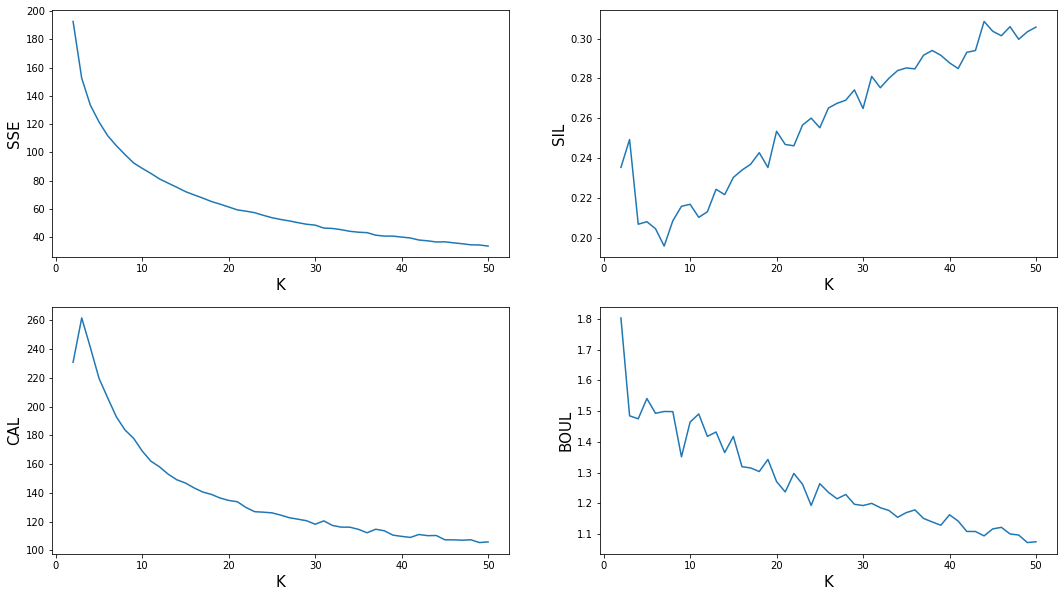

In [13]:
max_k = 50
sse_list = list()
silhouette = list()
calinski = list()
bouldin = list()
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
    
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, algorithm='full')
    kmeans.fit(train_data)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    sil = silhouette_score(train_data, kmeans.labels_)
    silhouette.append(sil)
    
    cal = calinski_harabasz_score(train_data, kmeans.labels_)
    calinski.append(cal)
    
    boul = davies_bouldin_score(train_data, kmeans.labels_)
    bouldin.append(boul)
    
    print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil, "\n",
         "Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
    print()
        
ax[0, 0].plot(range(2, len(sse_list) + 2), sse_list)
ax[0, 0].set_ylabel('SSE', fontsize=15)
ax[0, 0].set_xlabel('K', fontsize=15)
    
ax[0, 1].plot(range(2, len(silhouette) + 2), silhouette)
ax[0, 1].set_ylabel('SIL', fontsize=15)
ax[0, 1].set_xlabel('K', fontsize=15)
    
ax[1, 0].plot(range(2, len(calinski) + 2), calinski)
ax[1, 0].set_ylabel('CAL', fontsize=15)
ax[1, 0].set_xlabel('K', fontsize=15)
    
ax[1, 1].plot(range(2, len(bouldin) + 2), bouldin)
ax[1, 1].set_ylabel('BOUL', fontsize=15)
ax[1, 1].set_xlabel('K', fontsize=15)
    
plt.show()
fig.tight_layout()

In [14]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', n_init=1000, max_iter=10000, algorithm='full')
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('Labels: ', dict(zip(bins, hist)))
print()
print ('SSE: ', kmeans.inertia_)
print ('Silhouette Score: ', silhouette_score(train_data, kmeans.labels_))
print ("Calinski - Harabaz Score: ", calinski_harabasz_score(train_data, kmeans.labels_))
print ("Davies - Bouldin Score: ", davies_bouldin_score(train_data, kmeans.labels_))

centers [[0.18793103 0.78850575 0.31965517 0.23663793 0.45517241]
 [0.09893048 0.12655971 0.58181818 0.16911765 0.42245989]
 [0.11936937 0.15115115 0.17087087 0.15728228 0.44744745]
 [0.53899083 0.20795107 0.30848624 0.44954128 0.43730887]]

Labels:  {0: 145, 1: 187, 2: 333, 3: 218}

SSE:  133.4095910564112
Silhouette Score:  0.20605569885936112
Calinski - Harabaz Score:  241.20796382333222
Davies - Bouldin Score:  1.4664214957219779


In [15]:
diz_kmeans_4_Features_Notebook = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_4_Features_Notebook['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_4_Features_Notebook['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_4_Features_Notebook['sse'] = float(kmeans.inertia_)
diz_kmeans_4_Features_Notebook['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))
diz_kmeans_4_Features_Notebook['calinski'] = float(calinski_harabasz_score(train_data, kmeans.labels_))
diz_kmeans_4_Features_Notebook['bouldin'] = float(davies_bouldin_score(train_data, kmeans.labels_))

In [16]:
with open('diz_kmeans_4_Features_Notebook.json', 'w') as fp:
    json.dump(diz_kmeans_4_Features_Notebook, fp, indent=4)

In [17]:
df['Labels'] = kmeans.labels_

In [18]:
df

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction,Labels
0,0.50,0.000000,0.40,0.4375,0.333333,3
1,1.00,0.333333,0.05,0.5000,0.333333,3
2,0.25,0.333333,0.05,0.3125,0.666667,2
3,0.00,0.000000,0.15,0.4375,0.333333,2
4,0.00,0.000000,0.50,0.1250,0.666667,1
...,...,...,...,...,...,...
878,0.00,0.000000,0.50,0.0000,0.666667,1
879,0.00,0.666667,0.85,0.0000,0.666667,0
880,0.25,0.000000,0.55,0.4375,0.333333,1
881,0.25,0.000000,0.15,0.1250,0.333333,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JobLevel             883 non-null    float64
 1   StockOptionLevel     883 non-null    float64
 2   YearsAtCompany       883 non-null    float64
 3   YearsInCurrentRole   883 non-null    float64
 4   OverallSatisfaction  883 non-null    float64
 5   Labels               883 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 38.1 KB


In [20]:
np.unique(df['Labels'])

array([0, 1, 2, 3], dtype=int32)

In [21]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([145, 187, 333, 218]))

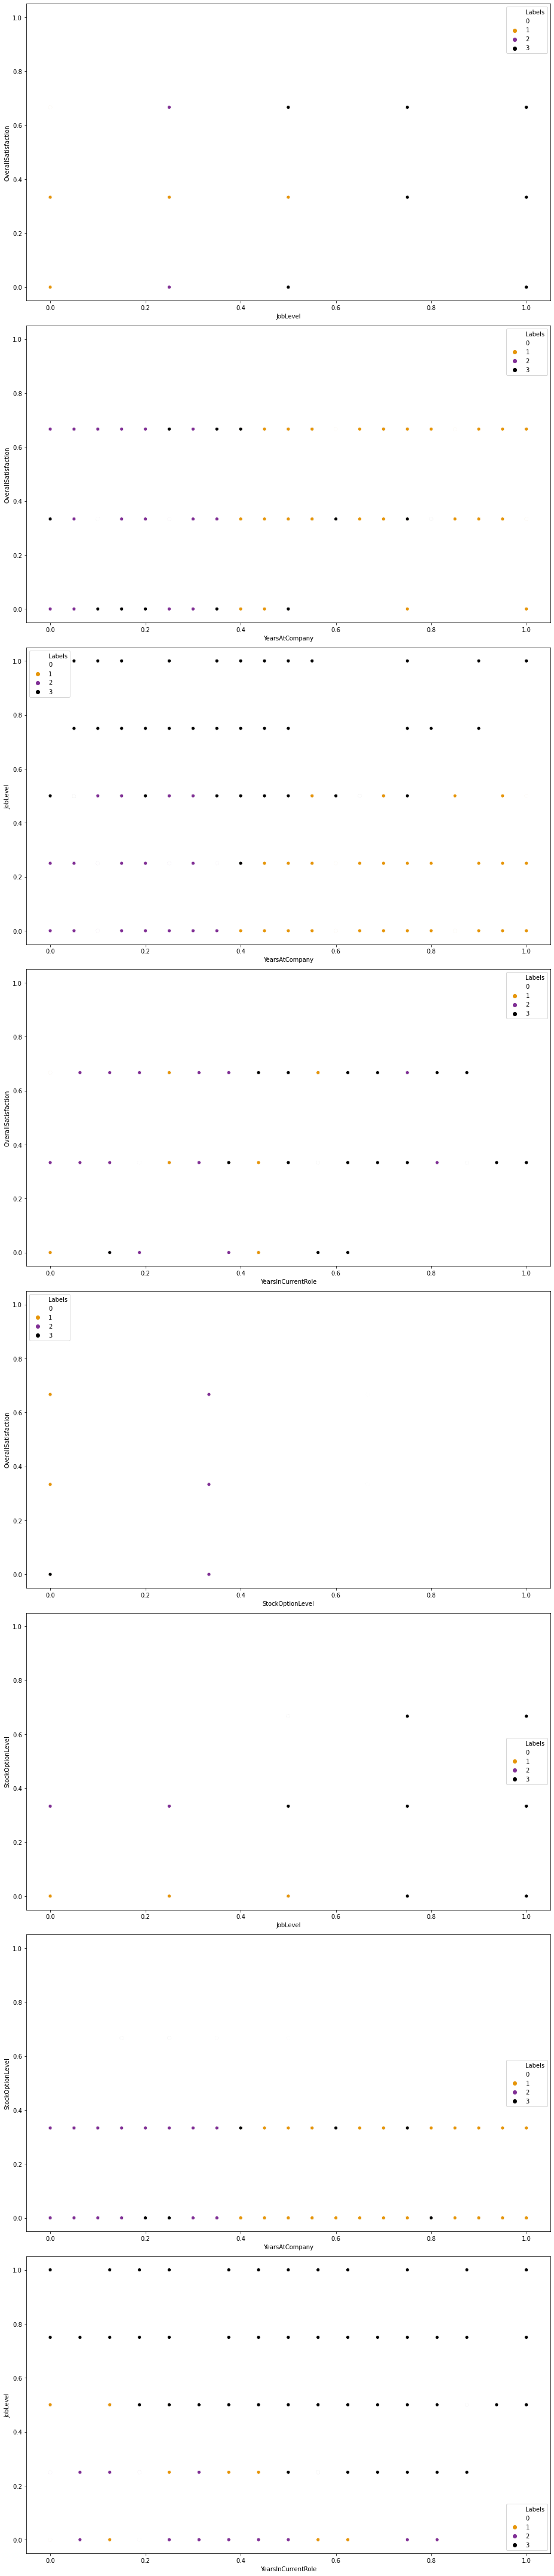

In [22]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize = (13,60))

sns.scatterplot(x = 'JobLevel', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'YearsAtCompany', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'JobLevel', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'StockOptionLevel', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'JobLevel', y = 'StockOptionLevel', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'StockOptionLevel', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'JobLevel', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)


plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [23]:
scaler = MinMaxScaler()

In [24]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [25]:
df_NON_normalized

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyHours,TaxRate,OverallSatisfaction
0,52,0,0,1,0,9,4,2,0,3,...,17,3,0,2,2,8,7,156.61,0.39,2
1,36,0,0,1,0,1,1,2,0,3,...,14,3,1,3,3,1,8,157.94,0.41,2
2,25,0,0,0,1,16,3,3,0,3,...,25,3,1,4,3,1,5,448.06,0.70,3
3,33,0,0,1,0,5,4,2,0,3,...,14,2,0,1,3,3,7,271.91,0.84,2
4,31,0,0,1,0,9,2,3,1,3,...,12,3,0,2,3,10,2,106.37,0.21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,38,1,0,1,0,12,3,3,1,4,...,15,4,0,2,3,10,0,282.47,0.79,3
879,37,0,0,1,0,16,2,4,1,4,...,13,2,2,3,2,17,0,76.29,0.71,3
880,33,1,1,0,0,6,4,2,1,1,...,18,2,0,2,2,11,7,272.88,0.75,2
881,33,0,0,1,0,4,1,3,0,2,...,12,1,0,2,4,3,2,208.67,0.86,2


In [26]:
df_NN = pd.DataFrame()

col_to_add = ['JobLevel', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'OverallSatisfaction']

for element in col_to_add:
    df_NN[element] = df_NON_normalized[element]
    
df_NN

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
0,3,0,8,7,2
1,5,1,1,8,2
2,2,1,1,5,3
3,1,0,3,7,2
4,1,0,10,2,3
...,...,...,...,...,...
878,1,0,10,0,3
879,1,2,17,0,3
880,2,0,11,7,2
881,2,0,3,2,2


In [27]:
X = scaler.fit_transform(df_NN.values)

In [28]:
print(kmeans.cluster_centers_)

[[0.18793103 0.78850575 0.31965517 0.23663793 0.45517241]
 [0.09893048 0.12655971 0.58181818 0.16911765 0.42245989]
 [0.11936937 0.15115115 0.17087087 0.15728228 0.44744745]
 [0.53899083 0.20795107 0.30848624 0.44954128 0.43730887]]


In [29]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [30]:
print(centers)

[[ 1.75172414  2.36551724  6.39310345  3.7862069   2.36551724]
 [ 1.39572193  0.37967914 11.63636364  2.70588235  2.26737968]
 [ 1.47747748  0.45345345  3.41741742  2.51651652  2.34234234]
 [ 3.1559633   0.62385321  6.16972477  7.19266055  2.31192661]]


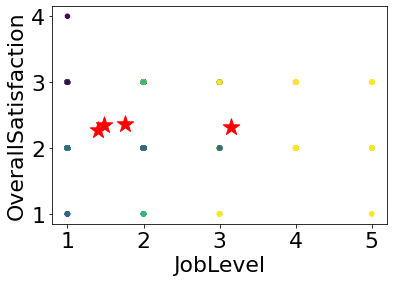

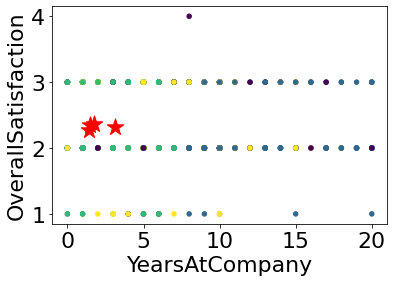

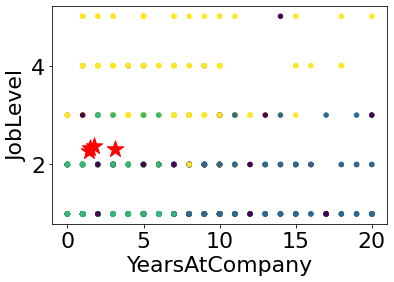

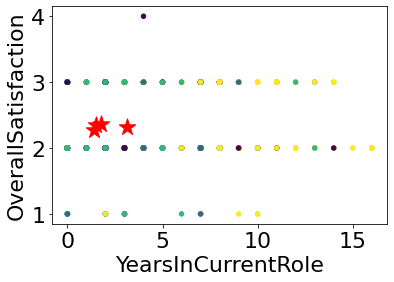

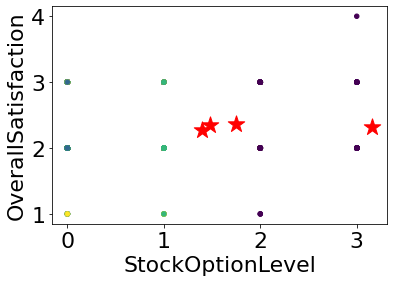

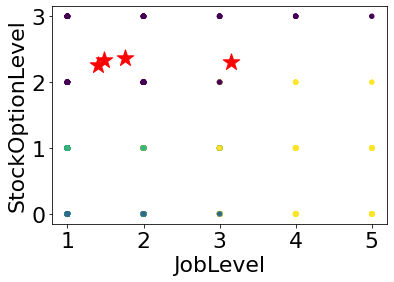

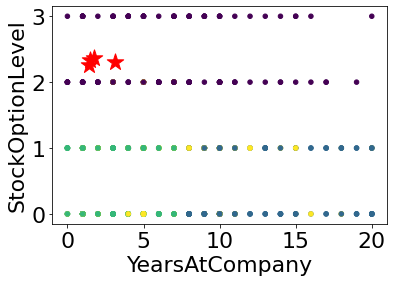

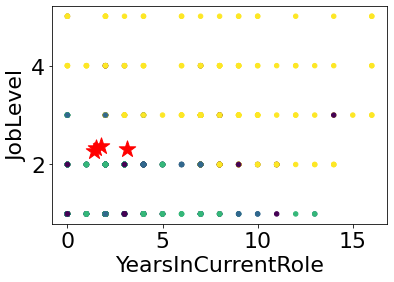

In [31]:
features_to_plot = [('JobLevel', 'OverallSatisfaction'), ('YearsAtCompany', 'OverallSatisfaction'),
                    ('YearsAtCompany', 'JobLevel'), ('YearsInCurrentRole', 'OverallSatisfaction'), 
                    ('StockOptionLevel', 'OverallSatisfaction'), 
                    ('JobLevel', 'StockOptionLevel'), ('YearsAtCompany', 'StockOptionLevel'),
                    ('YearsInCurrentRole', 'JobLevel')]

for a, b in features_to_plot:
    plt.scatter(df_NN[a], df_NN[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 4], s=300, marker='*', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

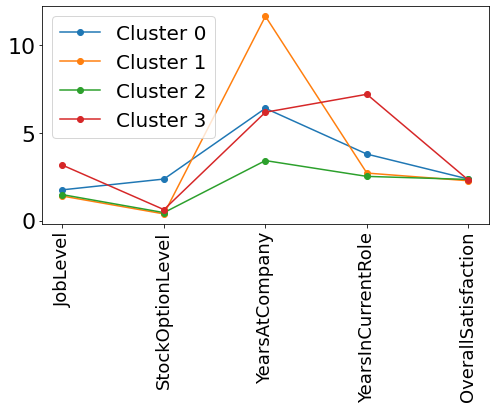

In [32]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_NN.columns)), df_NN.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

In [33]:
df_NN['Labels'] = df['Labels']

In [34]:
df_NN

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction,Labels
0,3,0,8,7,2,3
1,5,1,1,8,2,3
2,2,1,1,5,3,2
3,1,0,3,7,2,2
4,1,0,10,2,3,1
...,...,...,...,...,...,...
878,1,0,10,0,3,1
879,1,2,17,0,3,0
880,2,0,11,7,2,1
881,2,0,3,2,2,2


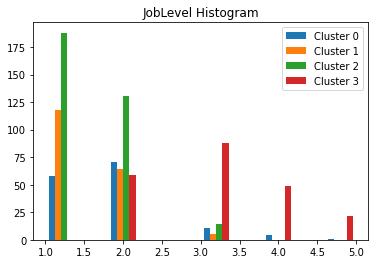

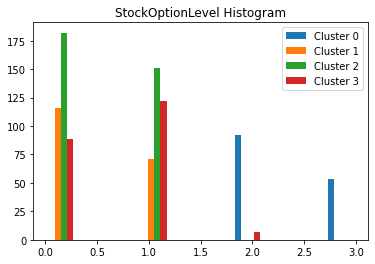

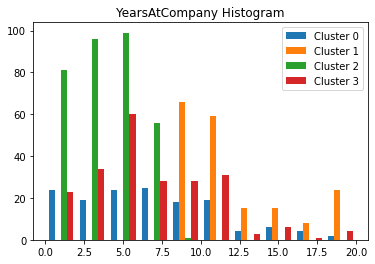

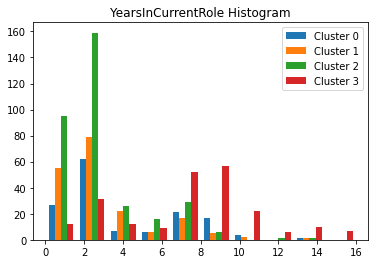

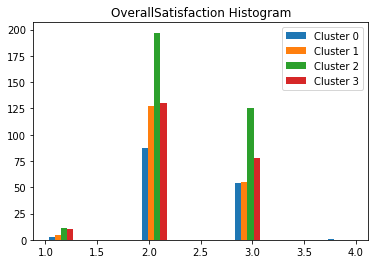

In [36]:
for column in df_NN.columns:
    if column != 'Labels':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df_NN['Labels']):
            cluster_list.append(df_NN[df_NN['Labels'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

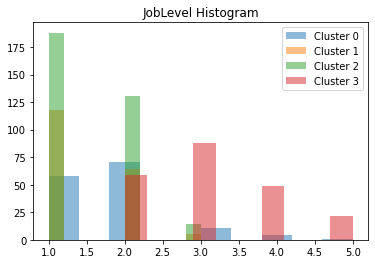

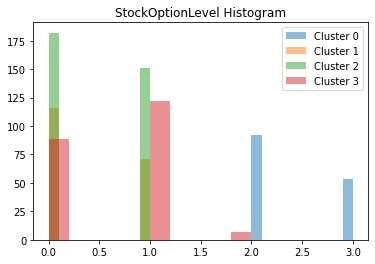

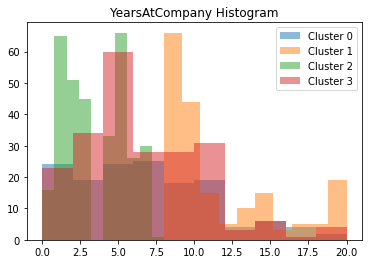

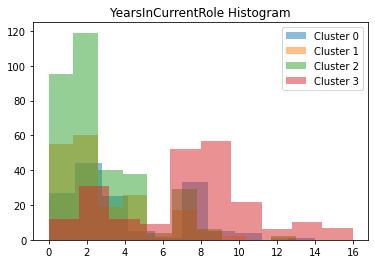

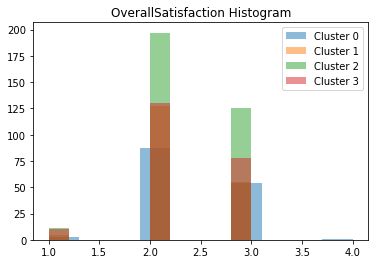

In [37]:
for column in df_NN.columns:
    if column != 'Labels':
    
        for num_cluster in np.unique(df_NN['Labels']):
            plt.hist(df_NN[df_NN['Labels'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

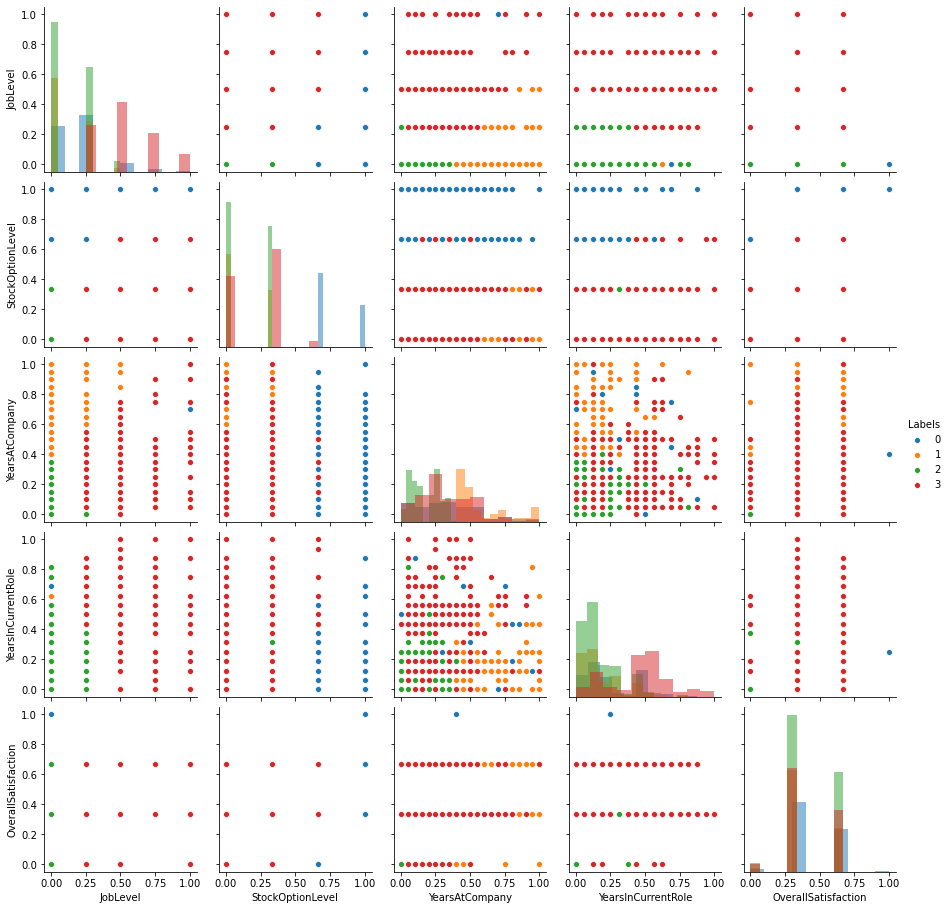

In [38]:
sns.pairplot(df, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")

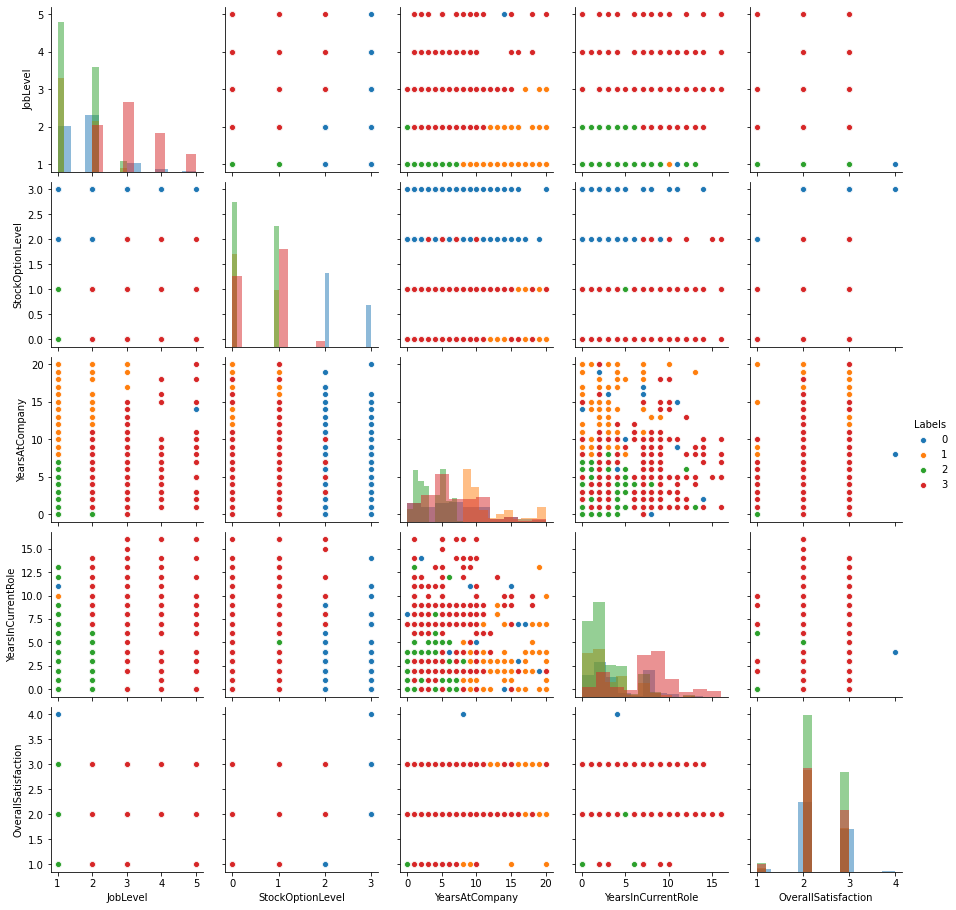

In [39]:
sns.pairplot(df_NN, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")